## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## importing the dataset

In [2]:
df = pd.read_csv('data/Soil_data.csv')
df.head()

,siteinfor,country,latitude,longitude,elevation,mat,map,samplingdepth,samplingthickness,sandperc,...,covercrop,covercropgroup,graincrop,graincropgroup,fertilization_c,fertilization_t,conservation_type,controldescription,yield_c,yield_t
0,New York,USA,40.71,-74.01,3.5,NaN,NaN,Not-available,Not-available,NaN,...,White_clover,Legume,Bean/Beet/Corn/Bean,MTT,NaN,NaN,CC,Fallow,NaN,NaN
1,New York,USA,40.71,-74.01,3.5,NaN,NaN,Not-available,Not-available,NaN,...,Vetch,Legume,Bean/Beet/Corn/Bean,MTT,NaN,NaN,CC,Fallow,NaN,NaN
2,New York,USA,40.71,-74.01,3.5,NaN,NaN,Not-available,Not-available,NaN,...,White_mustard,Brassica,Bean/Beet/Corn/Bean,MTT,NaN,NaN,CC,Fallow,4862.0,3990.0
3,New York,USA,40.71,-74.01,3.5,NaN,NaN,Not-available,Not-available,NaN,...,Alfalfa,Legume,Bean/Beet/Corn/Bean,MTT,NaN,NaN,CC,Fallow,NaN,NaN
4,New York,USA,40.71,-74.01,3.5,NaN,NaN,Not-available,Not-available,NaN,...,Ryegrass,Rye,Bean/Beet/Corn/Bean,MTT,NaN,NaN,CC,Fallow,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4457 entries, 0 to 4456
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   siteinfor           4457 non-null   object 
 1   country             4457 non-null   object 
 2   latitude            4457 non-null   float64
 3   longitude           4457 non-null   float64
 4   elevation           4457 non-null   float64
 5   mat                 582 non-null    float64
 6   map                 2070 non-null   float64
 7   samplingdepth       4038 non-null   object 
 8   samplingthickness   3950 non-null   object 
 9   sandperc            2194 non-null   float64
 10  siltperc            2194 non-null   float64
 11  texture             3989 non-null   object 
 12  soilph              2223 non-null   float64
 13  covercrop           4457 non-null   object 
 14  covercropgroup      4457 non-null   object 
 15  graincrop           4457 non-null   object 
 16  grainc

In [4]:
df = df.dropna(subset=[df.columns[-2], df.columns[-1]])
df.shape

(1958, 23)

In [5]:
df.drop(['mat','country','fertilization_c','fertilization_t'] , axis = 1 , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1958 entries, 2 to 4456
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   siteinfor           1958 non-null   object 
 1   latitude            1958 non-null   float64
 2   longitude           1958 non-null   float64
 3   elevation           1958 non-null   float64
 4   map                 1124 non-null   float64
 5   samplingdepth       1631 non-null   object 
 6   samplingthickness   1623 non-null   object 
 7   sandperc            1066 non-null   float64
 8   siltperc            1066 non-null   float64
 9   texture             1663 non-null   object 
 10  soilph              1190 non-null   float64
 11  covercrop           1958 non-null   object 
 12  covercropgroup      1958 non-null   object 
 13  graincrop           1958 non-null   object 
 14  graincropgroup      1958 non-null   object 
 15  conservation_type   1958 non-null   object 
 16  controldesc

In [6]:
columns_to_fill = ['map','sandperc','siltperc','soilph']
columns_to_replace = ['samplingdepth', 'samplingthickness']

for columns in columns_to_replace:
    df[columns].replace('Not-available', 'Not_available', inplace = True)

df['texture'].replace('NotAvailable','Not_available',inplace=True)

for columns in columns_to_fill:
    df[columns].fillna(df[columns].mean(), inplace = True)

df['samplingdepth'].fillna('Not_available',inplace=True)
df['samplingthickness'].fillna('Not_available',inplace=True)
df['texture'].fillna('Not_available',inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1958 entries, 2 to 4456
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   siteinfor           1958 non-null   object 
 1   latitude            1958 non-null   float64
 2   longitude           1958 non-null   float64
 3   elevation           1958 non-null   float64
 4   map                 1958 non-null   float64
 5   samplingdepth       1958 non-null   object 
 6   samplingthickness   1958 non-null   object 
 7   sandperc            1958 non-null   float64
 8   siltperc            1958 non-null   float64
 9   texture             1958 non-null   object 
 10  soilph              1958 non-null   float64
 11  covercrop           1958 non-null   object 
 12  covercropgroup      1958 non-null   object 
 13  graincrop           1958 non-null   object 
 14  graincropgroup      1958 non-null   object 
 15  conservation_type   1958 non-null   object 
 16  controldesc

In [7]:
X = df.iloc[:,1:-2].values
Y = df.iloc[:,-2:].values
print(X.shape)

(1958, 16)


## Encoding categorical data

In [8]:
columns_to_encode = [4,5,8,10,11,12,13,14,15]

label_encoder = LabelEncoder()
numeric_transformer = MinMaxScaler()  

for col_index in columns_to_encode:
    X[:, col_index] = label_encoder.fit_transform(X[:, col_index])

ct = ColumnTransformer(transformers = [('num', numeric_transformer, [0,1,2,3,6,7,9])], remainder='passthrough')

X = np.array(ct.fit_transform(X))
Y = np.array(Y)

In [9]:
print(X.shape)
print(Y.shape)

(1958, 16)
(1958, 2)


## Splitting the Dataset into train and test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Training the model on the  train dataset

In [11]:
base_regressor = RandomForestRegressor()

multi_output_regressor = MultiOutputRegressor(base_regressor)
multi_output_regressor.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor())

## predicting the test results

In [12]:
y_pred = multi_output_regressor.predict(X_test)
np.set_printoptions(precision=2)

comparison = np.concatenate((y_pred, y_test), axis=1)
print(comparison)

[[2626.33 2765.05 2710.   3360.  ]
 [7984.08 7846.91 7997.   7827.  ]
 [3455.68 5742.03 4700.   5400.  ]
 ...
 [1558.01 2411.88 1093.16 1600.  ]
 [ 194.73 1158.12  221.    639.  ]
 [ 245.52  240.09  445.    551.  ]]


In [35]:
mse_yield_c = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_yield_t = mean_squared_error(y_test[:, 1], y_pred[:, 1])

overall_mse = (mse_yield_c + mse_yield_t) / 2 

print(f"Yield_C - MSE: {mse_yield_c}")
print(f"Yield_T - MSE: {mse_yield_t}")
print(f"Overall MSE: {overall_mse}")

Yield_C - MSE: 22885866.718722187
Yield_T - MSE: 23195970.353464205
Overall MSE: 23040918.536093198


In [13]:
r2_yield_c = r2_score(y_test[:, 0], y_pred[:, 0])
r2_yield_t = r2_score(y_test[:, 1], y_pred[:, 1])

overall_r2 = (r2_yield_c + r2_yield_t) / 2

print(f"Yield_C - R2: {r2_yield_c}")
print(f"Yield_T - R2: {r2_yield_t}")
print(f"Overall R2: {overall_r2}")

Yield_C - R2: 0.7904631544735995
Yield_T - R2: 0.8064062580067703
Overall R2: 0.7984347062401849


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1958 entries, 2 to 4456
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   siteinfor           1958 non-null   object 
 1   latitude            1958 non-null   float64
 2   longitude           1958 non-null   float64
 3   elevation           1958 non-null   float64
 4   map                 1958 non-null   float64
 5   samplingdepth       1958 non-null   object 
 6   samplingthickness   1958 non-null   object 
 7   sandperc            1958 non-null   float64
 8   siltperc            1958 non-null   float64
 9   texture             1958 non-null   object 
 10  soilph              1958 non-null   float64
 11  covercrop           1958 non-null   object 
 12  covercropgroup      1958 non-null   object 
 13  graincrop           1958 non-null   object 
 14  graincropgroup      1958 non-null   object 
 15  conservation_type   1958 non-null   object 
 16  controldesc

<Axes: xlabel='siteinfor'>

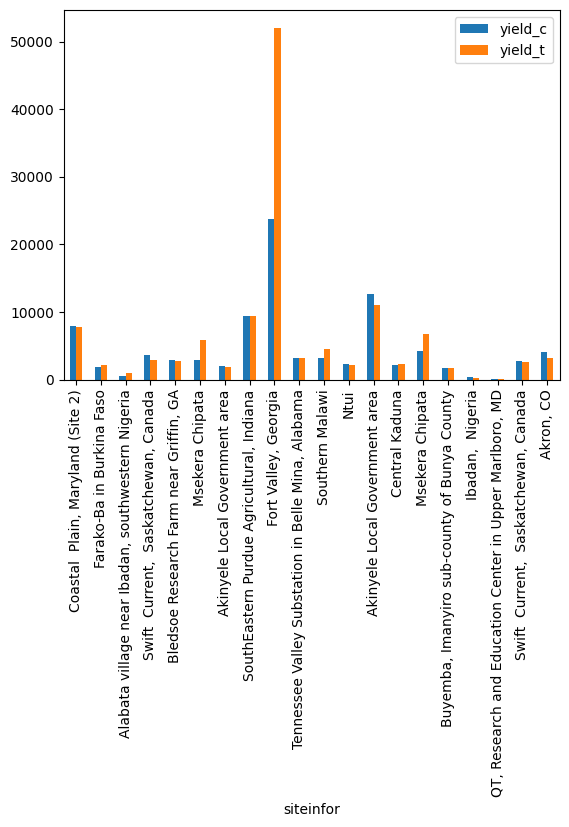

In [14]:
df.sample(n=20).plot(x="siteinfor", y=["yield_c", "yield_t"], kind="bar")